#BMI Analysis

 Following code is done by

 Name: Khairul Islam

 Id: 2020-1-60-109

##Data Preprocessing


###Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1]:
!gdown --id 1Qk5FZxfA_jhDcxI3YmuEIbVgd8ZeldMn

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Qk5FZxfA_jhDcxI3YmuEIbVgd8ZeldMn
To: /content/BMI Calculation_MJH.xlsx
100% 138k/138k [00:00<00:00, 132MB/s]


### Take a Quick Look at the Data Structure


In [3]:
data = pd.read_excel('/content/BMI Calculation_MJH.xlsx')

In [4]:
data.head()

,Feet,Inch,Hieght (cm),Hieght (m2),W1,W2,BMI (Before COVID),BMI (During COVID)
0,5,6.0,167.64,2.810317,70.0,78.0,24.908222,27.754876
1,5,1.0,154.94,2.400640,51.0,55.0,21.244332,22.910554
2,5,0.0,152.40,2.322576,44.0,49.0,18.944482,21.097264
3,5,1.0,154.94,2.400640,49.0,47.0,20.411221,19.578110
4,5,3.0,160.02,2.560640,75.0,78.0,29.289552,30.461134


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Feet                1602 non-null   int64  
 1   Inch                1602 non-null   float64
 2   Hieght (cm)         1602 non-null   float64
 3   Hieght (m2)         1602 non-null   float64
 4   W1                  1602 non-null   float64
 5   W2                  1602 non-null   float64
 6   BMI (Before COVID)  1602 non-null   float64
 7   BMI (During COVID)  1602 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 100.2 KB


In [ ]:
data.isnull().sum()

Feet                  0
Inch                  0
Hieght (cm)           0
Hieght (m2)           0
W1                    0
W2                    0
BMI (Before COVID)    0
BMI (During COVID)    0
dtype: int64

In [ ]:
data.describe()

,Feet,Inch,Hieght (cm),Hieght (m2),W1,W2,BMI (Before COVID),BMI (During COVID)
count,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000
mean,4.990012,4.876092,164.480855,2.714441,61.701623,63.661236,22.790117,23.525109
std,0.275867,3.092237,9.513994,0.316626,12.335592,21.016547,4.117923,7.678421
min,4.000000,0.000000,121.920000,1.486449,3.000000,0.400000,1.135256,0.156211
25%,5.000000,2.000000,157.480000,2.479995,53.000000,55.000000,20.112497,20.638241
50%,5.000000,5.000000,165.100000,2.725801,61.000000,62.000000,22.434305,23.129064
75%,5.000000,7.000000,170.180000,2.896123,69.000000,71.000000,24.993751,25.619886
max,7.000000,33.000000,236.220000,5.579989,118.000000,748.000000,40.472303,283.057207


### Exploratory Data Analysis (EDA)

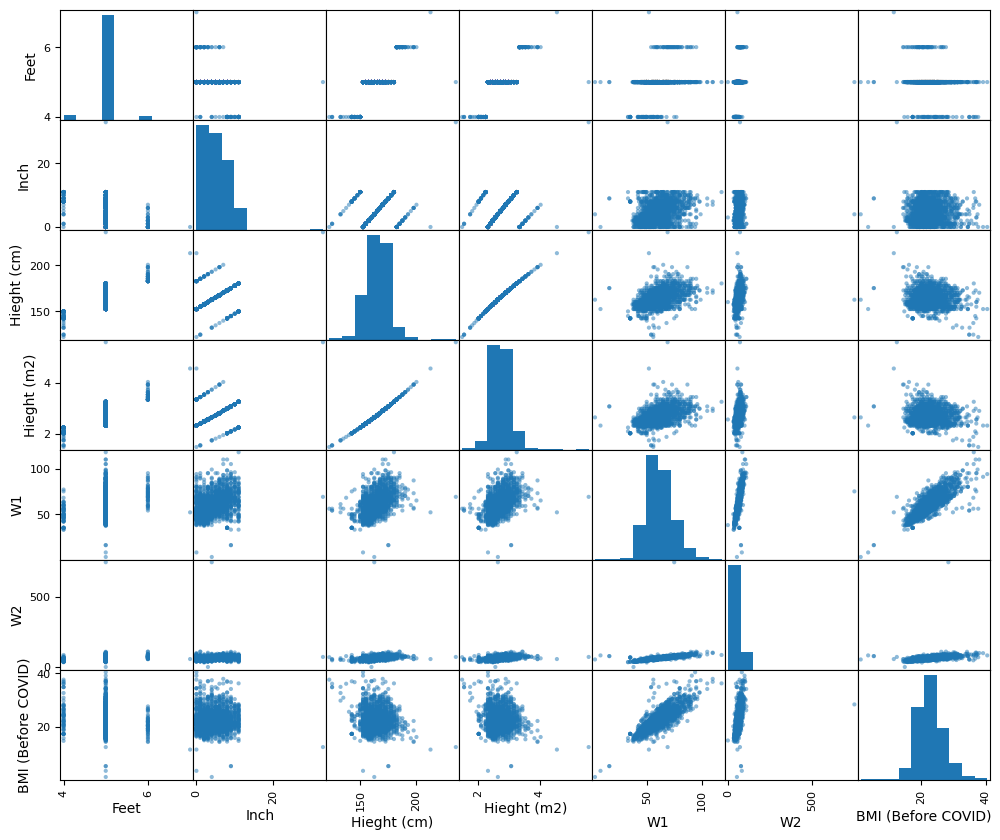

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Feet", "Inch", "Hieght (cm)",
              "Hieght (m2)","W1","W2","BMI (Before COVID)"]
scatter_matrix(data[attributes], figsize=(12, 10))

plt.show()

In [ ]:
import seaborn as sns
import plotly.express as px

In [ ]:
figure1 = px.scatter(data, x='W1', y='BMI (During COVID)', color='W1', title='BMI (During COVID) based on W1')
figure1.show()

In [ ]:
figure2 = px.scatter(data, x='W2', y='BMI (During COVID)', color='W2', title='BMI (During COVID) based on W2')
figure2.show()

In [ ]:
figure3 = px.scatter(data, x='Feet', y='BMI (During COVID)', color='Feet', title='BMI (During COVID) based on Feet')
figure3.show()

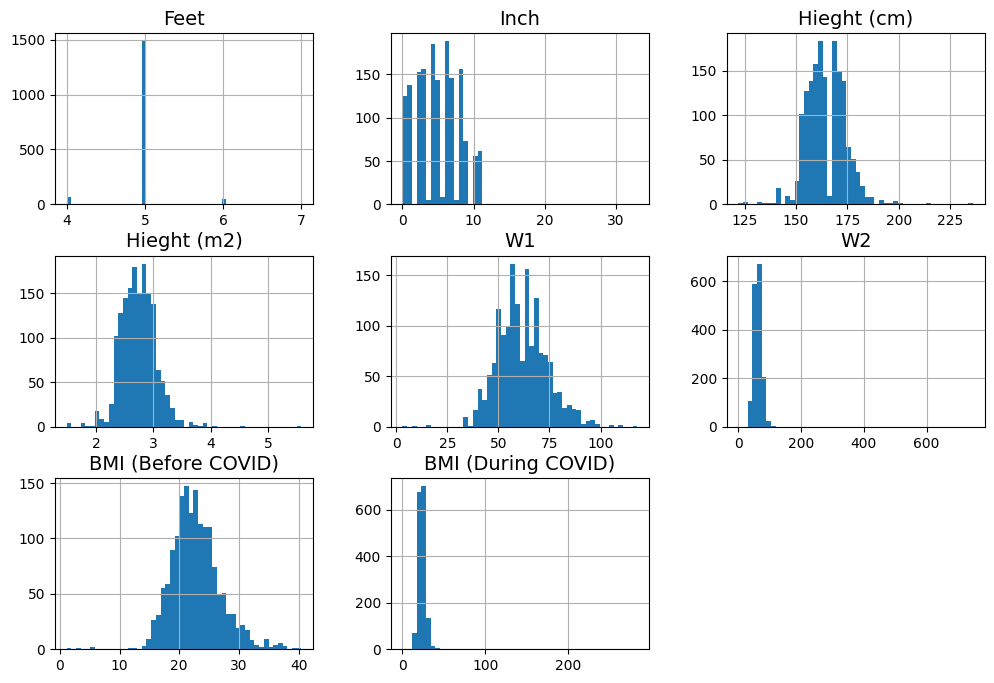

In [ ]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))

plt.show()

###Looking for Correlations


<Axes: >

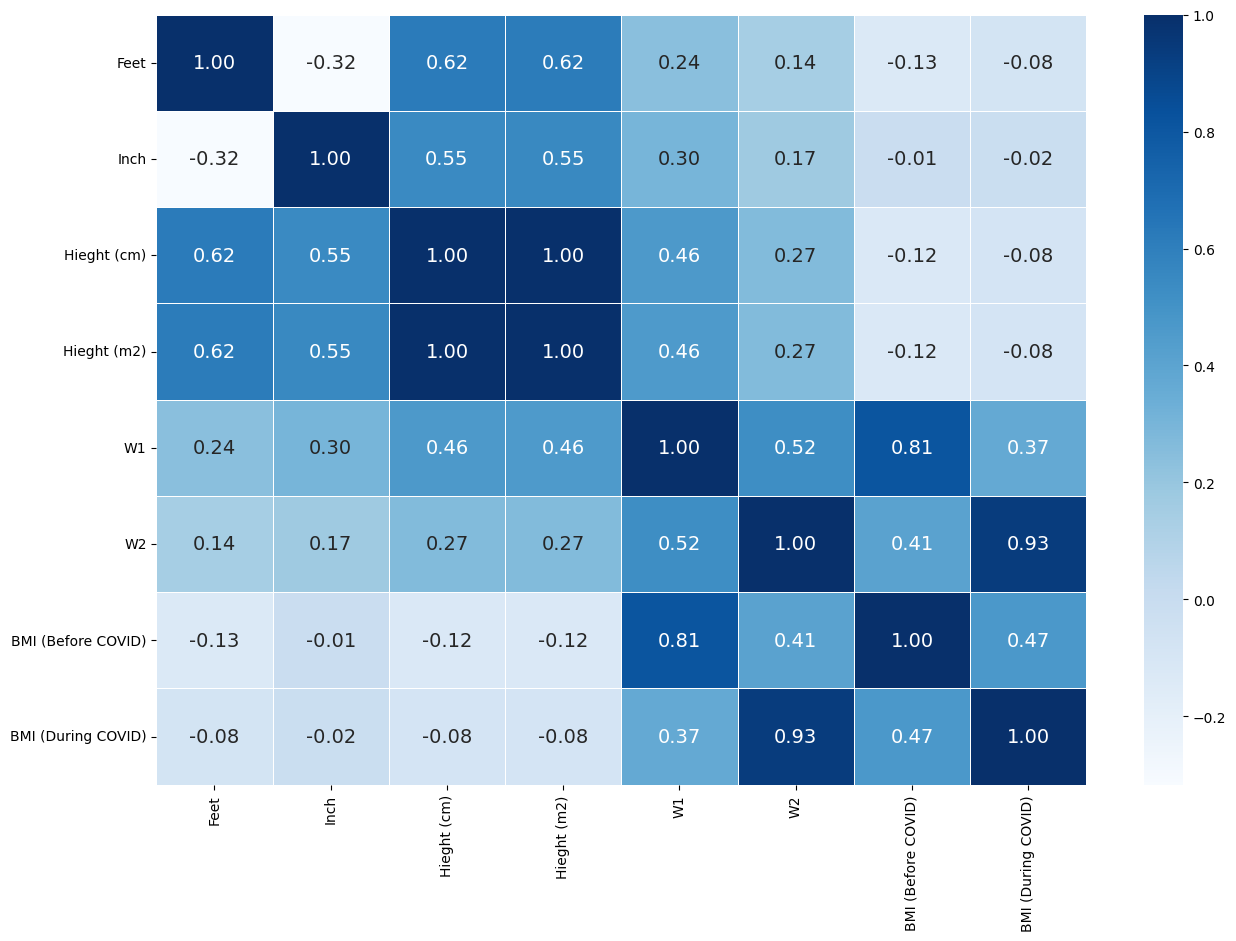

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="Blues")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Feet                1602 non-null   int64  
 1   Inch                1602 non-null   float64
 2   Hieght (cm)         1602 non-null   float64
 3   Hieght (m2)         1602 non-null   float64
 4   W1                  1602 non-null   float64
 5   W2                  1602 non-null   float64
 6   BMI (Before COVID)  1602 non-null   float64
 7   BMI (During COVID)  1602 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 100.2 KB


##Transformation Piplines

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [ ]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [ ]:

from sklearn.compose import ColumnTransformer

num_attribs = ["Inch", "Hieght (cm)", " Hieght (m2) ",
               "W1 ", "W2 ", " BMI (Before COVID)", "BMI (During COVID)"]



preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),

])

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.float64)),

)

In [ ]:
data_prepared = preprocessing.fit_transform(data)

In [ ]:
data_prepared_fr = pd.DataFrame(
    data_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=data.index)
data_prepared_fr.head(2)

,pipeline__Inch,pipeline__Hieght (cm),pipeline__Hieght (m2),pipeline__W1,pipeline__W2,pipeline__BMI (Before COVID),pipeline__BMI (During COVID)
0,0.363574,0.332156,0.302899,0.672928,0.682474,0.514523,0.551036
1,-1.253883,-1.003136,-0.991386,-0.867811,-0.412244,-0.375497,-0.080062


In [ ]:


default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("Measurement", num_pipeline, ["Inch", "Hieght (cm)", "Hieght (m2)"]),
        ("Weight", num_pipeline, ["W1", "W2"]),
        ("BMI", num_pipeline, ["BMI (Before COVID)", "BMI (During COVID)"]),

    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [ ]:
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape

(1602, 8)

In [ ]:
preprocessing.get_feature_names_out()

array(['Measurement__Inch', 'Measurement__Hieght (cm)',
       'Measurement__Hieght (m2)', 'Weight__W1', 'Weight__W2',
       'BMI__BMI (Before COVID)', 'BMI__BMI (During COVID)',
       'remainder__Feet'], dtype=object)

##Model Development


In [ ]:
from sklearn.model_selection import train_test_split

###Create a Test Set

In [ ]:
X = data[[ 'Inch', 'W1', 'W2', 'BMI (Before COVID)']].values
Y = data[['BMI (During COVID)']].values


In [ ]:
X.shape

(1602, 4)

In [ ]:
Y.shape

(1602, 1)

###Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(num_pipeline, LinearRegression())


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn import set_config

set_config(display='diagram')

In [ ]:
lin_reg

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(strategy='median')),
                                 ('standardscaler', StandardScaler())])),
                ('linearregression', LinearRegression())])

In [ ]:
x_train.shape

(1281, 4)

In [ ]:
y_train.shape

(1281, 1)

In [ ]:
lin_reg.fit(x_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(strategy='median')),
                                 ('standardscaler', StandardScaler())])),
                ('linearregression', LinearRegression())])

In [ ]:
data_predictions = lin_reg.predict(x_test)

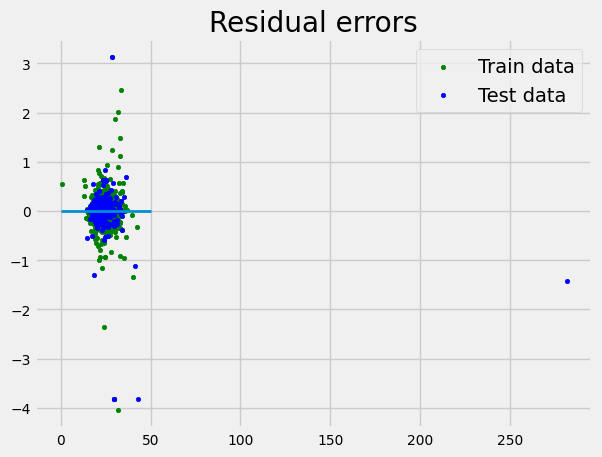

In [ ]:
# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(lin_reg.predict(x_train),
            lin_reg.predict(x_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(lin_reg.predict(x_test),
            lin_reg.predict(x_test) - y_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, data_predictions)
print(mse)

0.25897780085684785


###RandomForestRegressor

In [ ]:
from sklearn.svm import SVR

In [ ]:
ran_reg = make_pipeline(num_pipeline, SVR())

In [ ]:
ran_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('simpleimputer',
                                  SimpleImputer(strategy='median')),
                                 ('standardscaler', StandardScaler())])),
                ('svr', SVR())])

In [ ]:
y_pred = ran_reg.predict(x_test)


In [ ]:
mse2 = mean_squared_error(y_test, y_pred)
mse2

209.62021628392324

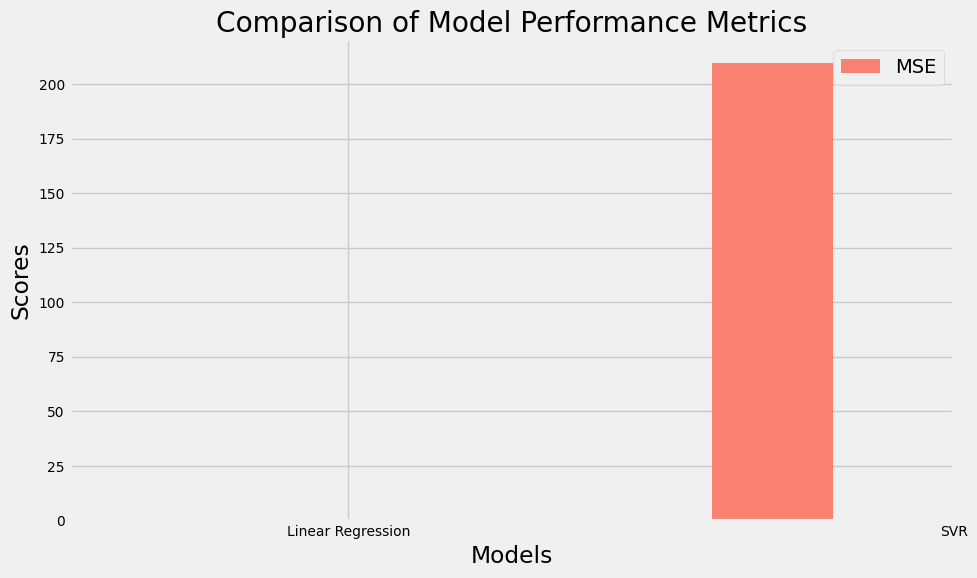

In [ ]:
models = ['Linear Regression','SVR']

# Define the performance metrics
metrics = ['MSE']

# Define the values for each metric for each model
# Replace these with your actual values
mse_values = [mse,mse2]


# Create a bar plot
width = 0.2
x = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 6))

colors = ["salmon", "lightblue"]

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, eval(f'{metric.lower()}_values'), width, label=metric, color=colors[i])

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()